In [ ]:
# Gerando Modelo de Machine Learning (Classificação)

In [ ]:
# Autor: Lucas Eduardo Fernandes de Oliveira

In [ ]:
#Conjunto de importacoes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [ ]:
#Carrega o dataset com os dados para o treinamento e validacao
dados_coracao = pd.read_csv("heart.csv", encoding="utf-8")

In [ ]:
#Definição dos atributos que deverao ser treinados para gerar o modelo de classificacao
data_treino = np.array(dados_coracao[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']])
#Definição do atributo de classificacao
data_classif = np.array(dados_coracao['target'])

In [ ]:
# Verificando o formato dos dados
dados_coracao.shape

(303, 14)

In [ ]:
# Verificando as primeiras linhas do dataset
dados_coracao.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
# Verificando as últimas linhas do dataset
dados_coracao.tail(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [ ]:
# Identificando a correlação entre as variáveis
# Correlação não implica causalidade
def plot_corr(dados_coracao, size=10):
    corr = dados_coracao.corr()    
    fig, ax = plt.subplots(figsize = (size, size))
    ax.matshow(corr)  
    plt.xticks(range(len(corr.columns)), corr.columns) 
    plt.yticks(range(len(corr.columns)), corr.columns) 

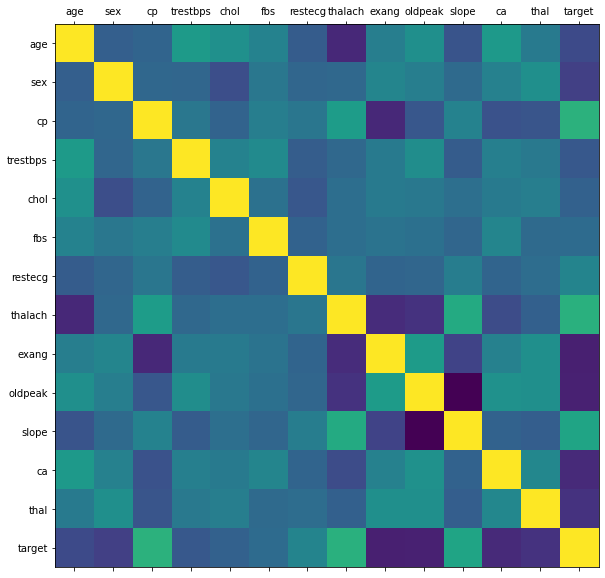

In [ ]:
# Criando o gráfico
plot_corr(dados_coracao)

In [ ]:
# Spliting = 70% para dados de treino e 30% para dados de teste

In [ ]:
#Definição dos conjuntos de treinamento e validação
x_treino, x_val, y_treino, y_val = train_test_split(data_treino, data_classif, test_size=0.30)

In [ ]:
#Apresentacao dos dados selecionados para o conjunto de treinamento e validacao
print("-----------------------")
print("Conjunto de Treinamento")
print(x_treino)
print("Conjunto de Validacao")
print(x_val)
print("-----------------------")

-----------------------
Conjunto de Treinamento
[[41.  1.  1. ...  1.  0.  1.]
 [57.  0.  0. ...  1.  0.  3.]
 [60.  1.  0. ...  1.  2.  3.]
 ...
 [76.  0.  2. ...  1.  0.  2.]
 [54.  1.  1. ...  2.  1.  3.]
 [38.  1.  3. ...  1.  0.  3.]]
Conjunto de Validacao
[[59.  1.  2. ...  2.  0.  2.]
 [44.  1.  1. ...  2.  0.  2.]
 [65.  0.  2. ...  2.  1.  2.]
 ...
 [50.  0.  1. ...  2.  0.  2.]
 [52.  1.  1. ...  2.  0.  2.]
 [57.  1.  0. ...  1.  1.  1.]]
-----------------------


In [ ]:
# Imprimindo os resultados
print("{0:0.2f}% nos dados de treino".format((len(x_treino)/len(dados_coracao.index)) * 100))
print("{0:0.2f}% nos dados de teste".format((len(x_val)/len(dados_coracao.index)) * 100))

69.97% nos dados de treino
30.03% nos dados de teste


In [ ]:
# - Aplicando o Algoritmo com o Naive Bayes - GaussianNB.

In [ ]:
#Treinamento do modelo com os dados atribuidos ao conjunto de treinamento
modelo_NB = GaussianNB()
modelo_NB.fit(x_treino, y_treino)

GaussianNB()

In [ ]:
#Predição e acurácia para o conjunto de treinamento
print("Predicao para o conjunto de treinamento")
y_pred_treino = modelo_NB.predict(x_treino)
print("Acuracia para o conjunto de treinamento")
print(accuracy_score(y_treino, y_pred_treino))
print("Na Base de Treinamento")

Predicao para o conjunto de treinamento
Acuracia para o conjunto de treinamento
0.8207547169811321
Na Base de Treinamento


In [ ]:
#Predição e acurácia para o conjunto de validação
print("Predicao para o conjunto de validacao")
y_pred_val = modelo_NB.predict(x_val)
print("Acuracia para o conjunto de validacao")
print(accuracy_score(y_val, y_pred_val))
print("na Base de Teste")

Predicao para o conjunto de validacao
Acuracia para o conjunto de validacao
0.8791208791208791
na Base de Teste


In [ ]:
from sklearn import metrics

In [ ]:
# Métricas

In [ ]:
# Criando uma Confusion Matrix
print("Confusion Matrix")

print("{0}".format(metrics.confusion_matrix(y_val, y_pred_val, labels = [1, 0])))
print("")

print("Classification Report")
print(metrics.classification_report(y_val, y_pred_val, labels = [1, 0]))

Confusion Matrix
[[50  4]
 [ 7 30]]

Classification Report
              precision    recall  f1-score   support

           1       0.88      0.93      0.90        54
           0       0.88      0.81      0.85        37

    accuracy                           0.88        91
   macro avg       0.88      0.87      0.87        91
weighted avg       0.88      0.88      0.88        91



In [ ]:
# Criando uma Curva Roc
print("Roc Curve")

# Compute ROC curve and ROC area for each class
#fpr = dict()
#tpr = dict()
#roc_auc = dict()
#for i in range(y_pred_val):
#    fpr[i], tpr[i], _ = roc_curve(y_val, y_pred_val)
#    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
#fpr["micro"], tpr["micro"], _ = roc_curve(y_val.ravel(), y_score.ravel())
#roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

Roc Curve


In [ ]:
# Otimizando o modelo com RandomForest
# Algoritmo 02 - RandomForest - Realizando operações com mais de um Algoritmo de Machine Learning (Classificação)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
modelo_v2 = RandomForestClassifier(random_state = 42)
modelo_v2.fit(x_treino, y_treino.ravel())

RandomForestClassifier(random_state=42)

In [ ]:
# Verificando os dados de treino
rf_predict_train = modelo_v2.predict(x_treino)
print("Exatidão (Accuracy): {0:.4f}".format(metrics.accuracy_score(y_treino, rf_predict_train)))

Exatidão (Accuracy): 1.0000


In [ ]:
# Verificando nos dados de teste
rf_predict_test = modelo_v2.predict(x_val)
print("Exatidão (Accuracy): na Base de Teste {0:.4f}".format(metrics.accuracy_score(y_val, rf_predict_test)))
print()

Exatidão (Accuracy): na Base de Teste 0.8901



In [ ]:
# Validação do Modelo com a Matrix de Confusão
print("Confusion Matrix")

print("{0}".format(metrics.confusion_matrix(y_val, rf_predict_test, labels = [1, 0])))
print("")

print("Classification Report")
print(metrics.classification_report(y_val, rf_predict_test, labels = [1, 0]))

Confusion Matrix
[[49  5]
 [ 5 32]]

Classification Report
              precision    recall  f1-score   support

           1       0.91      0.91      0.91        54
           0       0.86      0.86      0.86        37

    accuracy                           0.89        91
   macro avg       0.89      0.89      0.89        91
weighted avg       0.89      0.89      0.89        91



In [ ]:
#Regressão Logística

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# Terceira versão do modelo usando Regressão Logística
modelo_v3 = LogisticRegression(C = 0.7, random_state = 42)
modelo_v3.fit(x_treino, y_treino.ravel())
lr_predict_test = modelo_v3.predict(x_val)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
print("Exatidão (Accuracy): na Base de Teste {0:.4f}".format(metrics.accuracy_score(y_val, lr_predict_test)))
print()
print("Classification Report")
print(metrics.classification_report(y_val, lr_predict_test, labels = [1, 0]))

Exatidão (Accuracy): na Base de Teste 0.8901

Classification Report
              precision    recall  f1-score   support

           1       0.89      0.93      0.91        54
           0       0.89      0.84      0.86        37

    accuracy                           0.89        91
   macro avg       0.89      0.88      0.89        91
weighted avg       0.89      0.89      0.89        91



In [ ]:
### Resumindo
## Exatidão nos dados Mamíferos de teste

# Modelo usando algoritmo Naive Bayes         = 0.800  => Segunda Execução: 1.0
# Modelo usando algoritmo Random Forest       = 0.800  => Segunda Execução: 1.0 
# Modelo usando algoritmo Regressão Logística = 0.800  => Segunda Execução: 1.0